This notebook explores 6 machine learning modeles and Altman Z-Score model to predict bankruptcy.

- The models used are:
   - Decision tree
   - Gradient Boosting
   - Logistic Regression
   - Random Forest
   - K nearest Neighbours
   - Support Vector Machines

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [22]:
df = pd.read_csv("american_bankruptcy.csv")
df['Bankruptcy'] = df['status_label'].map({'failed': 1, 'alive': 0})

rename_map = {
    "X1":  "Current Assets",
    "X2":  "Cost of Goods Sold",
    "X3":  "D&A",
    "X4":  "EBITDA",
    "X5":  "Inventory",
    "X6":  "Net Income",
    "X7":  "Total Receivables",
    "X8":  "Market Value",
    "X9":  "Net Sales",
    "X10": "Total Assets",
    "X11": "Total Long-term Debt",
    "X12": "EBIT",
    "X13": "Gross Profit",
    "X14": "Total Current Liabilities",
    "X15": "Retained Earnings",
    "X16": "Total Revenue",
    "X17": "Total Liabilities",
    "X18": "Total Operating Expenses"
}
df = df.rename(columns=rename_map)

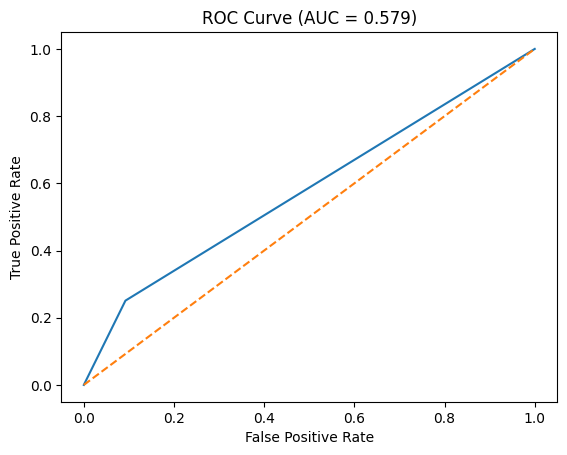

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        10888         1107
Actual 1          215           72

Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      0.91      0.94     11995
    Bankrupt       0.06      0.25      0.10       287

    accuracy                           0.89     12282
   macro avg       0.52      0.58      0.52     12282
weighted avg       0.96      0.89      0.92     12282

Accuracy : 0.8924
Precision: 0.0611
Recall   : 0.2509
F1 Score : 0.0982


In [23]:
#DECISION TREE

# Split into train/test
train = df[(df.year >= 1999) & (df.year <= 2011)]
test  = df[(df.year >= 2015) & (df.year <= 2018)]

features = list(rename_map.values())
X_train, y_train = train[features], train['Bankruptcy']
X_test,  y_test  = test[features],  test['Bankruptcy']

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and probabilities
y_pred  = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.3f})')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
print("Confusion Matrix:")
print(cm_df)


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Alive", "Bankrupt"]))

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

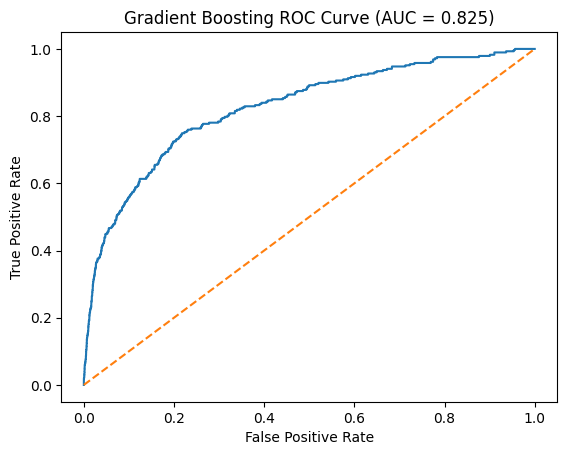

Gradient Boosting Confusion Matrix:
          Pred 0  Pred 1
Actual 0   11979      16
Actual 1     277      10

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      1.00      0.99     11995
    Bankrupt       0.38      0.03      0.06       287

    accuracy                           0.98     12282
   macro avg       0.68      0.52      0.53     12282
weighted avg       0.96      0.98      0.97     12282

Accuracy : 0.9761
Precision: 0.3846
Recall   : 0.0348
F1 Score : 0.0639


In [7]:
#GRADIENT BOOSTING


gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb  = gb_clf.predict(X_test)
y_proba_gb = gb_clf.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for GB
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure()
plt.plot(fpr_gb, tpr_gb)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Gradient Boosting ROC Curve (AUC = {roc_auc_gb:.3f})')
plt.show()

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(pd.DataFrame(cm_gb, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=["Alive", "Bankrupt"]))

acc_gb  = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
rec_gb  = recall_score(y_test, y_pred_gb)
f1_gb   = f1_score(y_test, y_pred_gb)

print(f"Accuracy : {acc_gb:.4f}")
print(f"Precision: {prec_gb:.4f}")
print(f"Recall   : {rec_gb:.4f}")
print(f"F1 Score : {f1_gb:.4f}")

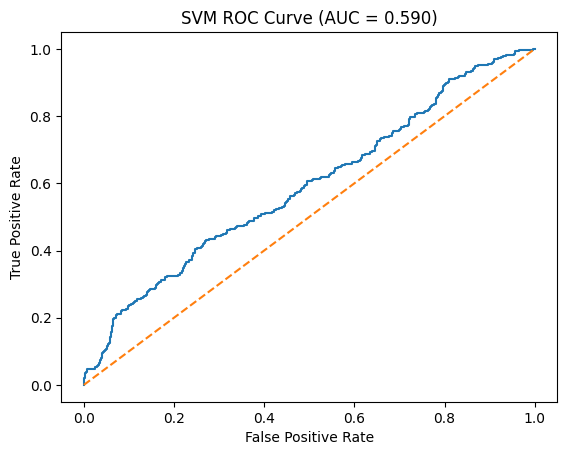

SVM Confusion Matrix:
          Pred 0  Pred 1
Actual 0   11991       4
Actual 1     285       2

SVM Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      1.00      0.99     11995
    Bankrupt       0.33      0.01      0.01       287

    accuracy                           0.98     12282
   macro avg       0.66      0.50      0.50     12282
weighted avg       0.96      0.98      0.97     12282

Accuracy : 0.9765
Precision: 0.3333
Recall   : 0.0070
F1 Score : 0.0137


In [8]:
# SUPPORT VECTOR MACHINE

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc',    SVC(kernel='rbf', probability=True, random_state=42))
])
svm_pipeline.fit(X_train, y_train)

y_pred_svm   = svm_pipeline.predict(X_test)
y_proba_svm  = svm_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm        = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'SVM ROC Curve (AUC = {roc_auc_svm:.3f})')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(pd.DataFrame(cm_svm, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))

# Classification Report and Metrics
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Alive", "Bankrupt"]))

print(f"Accuracy : {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_svm):.4f}")

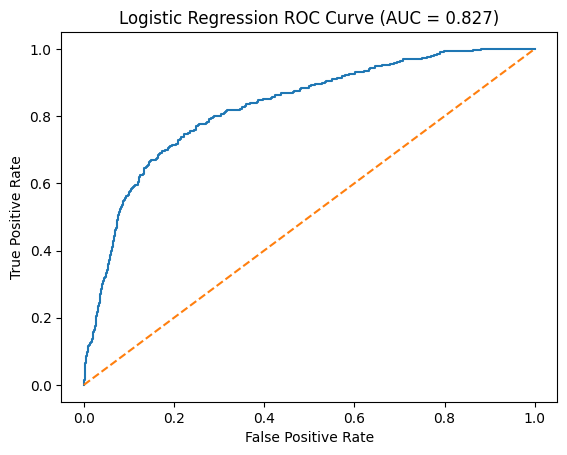

Logistic Regression Confusion Matrix:
          Pred 0  Pred 1
Actual 0   11962      33
Actual 1     272      15

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      1.00      0.99     11995
    Bankrupt       0.31      0.05      0.09       287

    accuracy                           0.98     12282
   macro avg       0.65      0.52      0.54     12282
weighted avg       0.96      0.98      0.97     12282

Accuracy : 0.9752
Precision: 0.3125
Recall   : 0.0523
F1 Score : 0.0896


In [9]:
# LOGISTIC REGRESSION

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg',  LogisticRegression(solver='liblinear', random_state=42))
])
logreg_pipeline.fit(X_train, y_train)

y_pred_lr  = logreg_pipeline.predict(X_test)
y_proba_lr = logreg_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr       = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression ROC Curve (AUC = {roc_auc_lr:.3f})')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(pd.DataFrame(cm_lr, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))

# Classification Report and Metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Alive", "Bankrupt"]))

print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_lr):.4f}")

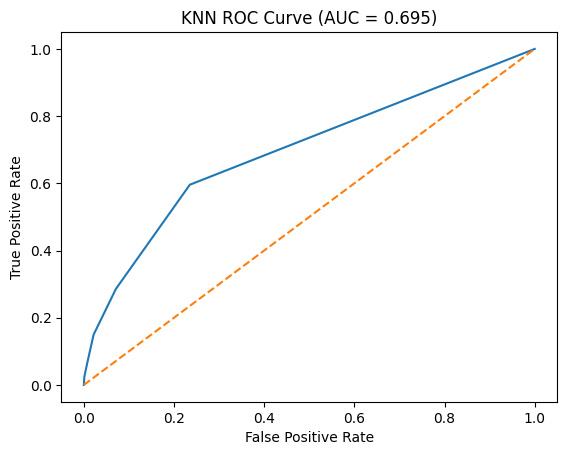

KNN Confusion Matrix:
          Pred 0  Pred 1
Actual 0   11734     261
Actual 1     244      43

KNN Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      0.98      0.98     11995
    Bankrupt       0.14      0.15      0.15       287

    accuracy                           0.96     12282
   macro avg       0.56      0.56      0.56     12282
weighted avg       0.96      0.96      0.96     12282

Accuracy : 0.9589
Precision: 0.1414
Recall   : 0.1498
F1 Score : 0.1455


In [24]:
# K-Nearest Neighbors


knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn',    KNeighborsClassifier(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)

y_pred_knn  = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn         = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'KNN ROC Curve (AUC = {roc_auc_knn:.3f})')
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(pd.DataFrame(cm_knn, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))

# Classification Report & Metrics for KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=["Alive", "Bankrupt"]))

print(f"Accuracy : {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_knn):.4f}")

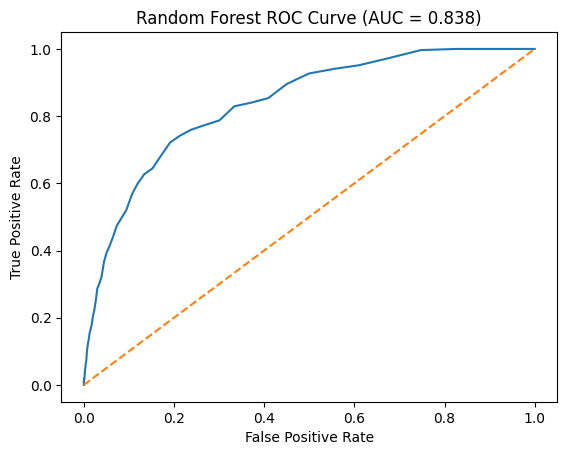

Random Forest Confusion Matrix:
          Pred 0  Pred 1
Actual 0   11976      19
Actual 1     280       7

Random Forest Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      1.00      0.99     11995
    Bankrupt       0.27      0.02      0.04       287

    accuracy                           0.98     12282
   macro avg       0.62      0.51      0.52     12282
weighted avg       0.96      0.98      0.97     12282

Accuracy : 0.9757
Precision: 0.2692
Recall   : 0.0244
F1 Score : 0.0447


In [11]:
# RANDOM FOREST

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf   = rf_clf.predict(X_test)
y_proba_rf  = rf_clf.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf        = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest ROC Curve (AUC = {roc_auc_rf:.3f})')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(pd.DataFrame(cm_rf, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))

# Classification Report & Metrics for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Alive", "Bankrupt"]))

print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf):.4f}")

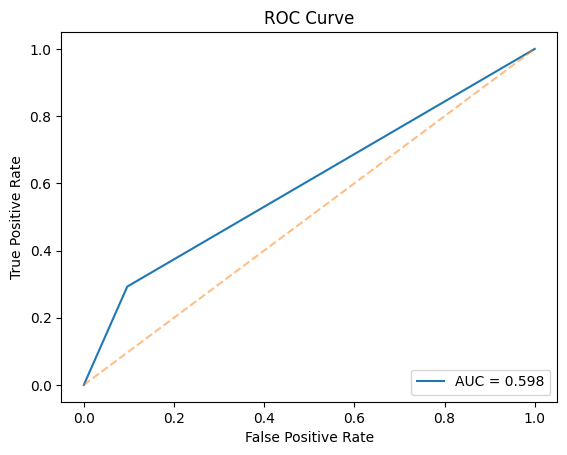

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        10839         1156
Actual 1          203           84

Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      0.90      0.94     11995
    Bankrupt       0.07      0.29      0.11       287

    accuracy                           0.89     12282
   macro avg       0.52      0.60      0.53     12282
weighted avg       0.96      0.89      0.92     12282

Accuracy : 0.8894
Precision: 0.0677
Recall   : 0.2927
F1 Score : 0.1100


In [ ]:
# ALTMAN Z-SCORE

df['Working Capital'] = df['Current Assets'] - df['Total Current Liabilities']
df['Z_Score'] = (
    1.2 * (df['Working Capital']    / df['Total Assets']) +
    1.4 * (df['Retained Earnings']  / df['Total Assets']) +
    3.3 * (df['EBIT']              / df['Total Assets']) +
    0.6 * (df['Market Value']      / df['Total Liabilities']) +
    1.0 * (df['Total Revenue']     / df['Total Assets'])
)

train = df[(df['year'] >= 1999) & (df['year'] <= 2011)].copy()
test  = df[(df['year'] >= 2015) & (df['year'] <= 2018)].copy()

feature_cols = [
    "Current Assets", "Cost of Goods Sold", "D&A", "EBITDA", "Inventory",
    "Net Income", "Total Receivables", "Market Value", "Net Sales",
    "Total Assets", "Total Long-term Debt", "EBIT", "Gross Profit",
    "Total Current Liabilities", "Retained Earnings", "Total Revenue",
    "Total Liabilities", "Total Operating Expenses",
    "Working Capital", "Z_Score"
]

X_train, y_train = train[feature_cols], train['Bankruptcy']
X_test,  y_test  = test[feature_cols],  test['Bankruptcy']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred  = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Alive", "Bankrupt"]))

print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")

**FEATURE IMPORTANCES**

In [12]:
# Decision Tree importances
dt_importances = pd.Series(clf.feature_importances_, index=features) \
                   .sort_values(ascending=False)
print("Decision Tree Feature Importances:\n", dt_importances)

Decision Tree Feature Importances:
 Market Value                 0.074296
D&A                          0.072719
Retained Earnings            0.070422
Gross Profit                 0.069715
Inventory                    0.067758
Current Assets               0.065384
Total Long-term Debt         0.062338
Total Receivables            0.061902
Total Assets                 0.058380
Net Income                   0.057284
Total Current Liabilities    0.055438
Total Liabilities            0.052337
Cost of Goods Sold           0.049027
Total Operating Expenses     0.048662
EBIT                         0.043426
EBITDA                       0.042112
Net Sales                    0.026585
Total Revenue                0.022216
dtype: float64


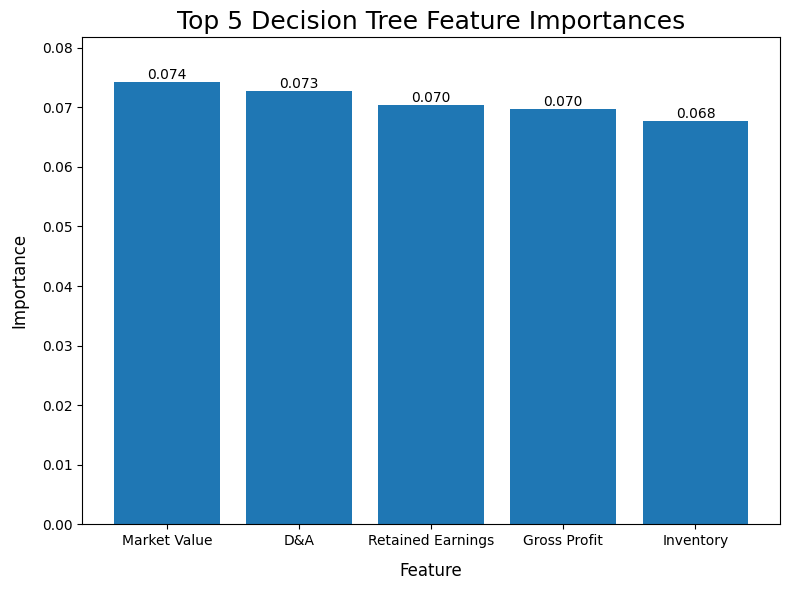

In [13]:
top5 = dt_importances.head(5)
plt.figure(figsize=(8, 6))
bars = plt.bar(top5.index, top5.values)

# X‑axis styling (smaller labels)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.xlabel('Feature', fontsize=12, labelpad=10)

# Y‑axis styling (smaller labels)
plt.yticks(fontsize=10)
plt.ylabel('Importance', fontsize=12, labelpad=10)

# Title styling (larger title)
plt.title('Top 5 Decision Tree Feature Importances', fontsize=18)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# Add padding above the bars
max_h = top5.values.max()
plt.ylim(0, max_h * 1.10)

plt.tight_layout()
plt.show()

In [14]:
# Gradient Boosting importances
gb_importances = pd.Series(gb_clf.feature_importances_, index=features) \
                   .sort_values(ascending=False)
print("\nGradient Boosting Feature Importances:\n", gb_importances)


Gradient Boosting Feature Importances:
 Total Long-term Debt         0.115407
Net Income                   0.113170
Retained Earnings            0.088011
Market Value                 0.083996
Inventory                    0.076477
Total Operating Expenses     0.071508
Current Assets               0.067936
Total Receivables            0.066965
Gross Profit                 0.056605
D&A                          0.045299
Total Liabilities            0.040103
EBITDA                       0.031667
EBIT                         0.030457
Cost of Goods Sold           0.028534
Net Sales                    0.026620
Total Current Liabilities    0.022211
Total Assets                 0.017786
Total Revenue                0.017248
dtype: float64


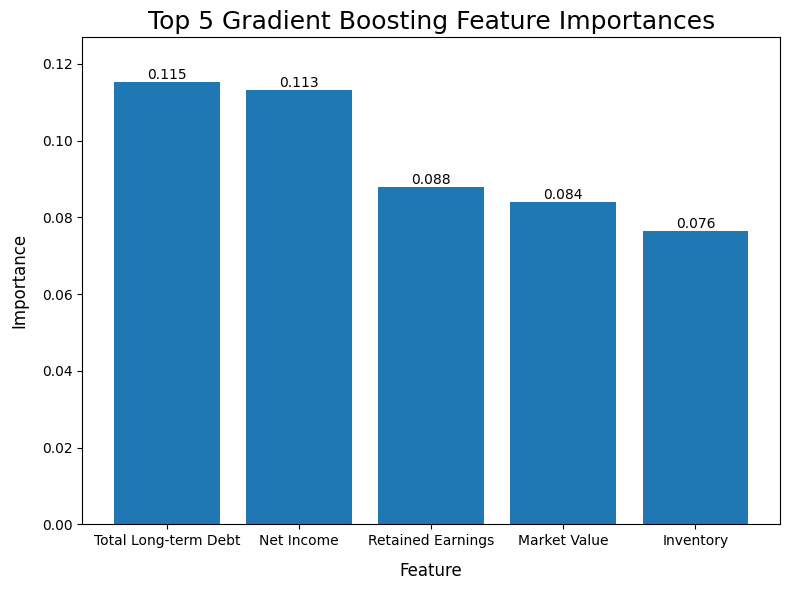

In [15]:
top5_gb = gb_importances.head(5)
plt.figure(figsize=(8, 6))
bars = plt.bar(top5_gb.index, top5_gb.values)

# X‑axis styling
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.xlabel('Feature', fontsize=12, labelpad=10)

# Y‑axis styling
plt.yticks(fontsize=10)
plt.ylabel('Importance', fontsize=12, labelpad=10)

# Title styling
plt.title('Top 5 Gradient Boosting Feature Importances', fontsize=18)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# Add 10% padding above the tallest bar
max_h_gb = top5_gb.values.max()
plt.ylim(0, max_h_gb * 1.10)

plt.tight_layout()
plt.show()


In [16]:
# SVM permutation importances
svm_perm = permutation_importance(svm_pipeline, X_test, y_test, n_repeats=10, random_state=42)
svm_importances = pd.Series(svm_perm.importances_mean, index=features) \
                     .sort_values(ascending=False)
print("\nSVM Permutation Importances:\n", svm_importances)


SVM Permutation Importances:
 Current Assets               0.000147
Total Receivables            0.000090
Gross Profit                 0.000008
Cost of Goods Sold           0.000000
Net Sales                    0.000000
D&A                          0.000000
Total Assets                 0.000000
Total Operating Expenses     0.000000
Total Revenue                0.000000
EBITDA                       0.000000
Inventory                   -0.000008
Market Value                -0.000008
Total Current Liabilities   -0.000008
Net Income                  -0.000016
EBIT                        -0.000016
Total Long-term Debt        -0.000090
Total Liabilities           -0.000163
Retained Earnings           -0.000220
dtype: float64


In [18]:
# Logistic Regression coefficient importances (absolute value)
lr_coef = logreg_pipeline.named_steps['logreg'].coef_[0]
lr_importances = pd.Series(abs(lr_coef), index=features) \
                    .sort_values(ascending=False)
print("\nLogistic Regression Coefficient Importances:\n", lr_importances)


Logistic Regression Coefficient Importances:
 Market Value                 1.102307
Current Assets               0.976875
Total Current Liabilities    0.500875
EBIT                         0.418057
Total Long-term Debt         0.366918
Total Liabilities            0.335098
EBITDA                       0.309482
Inventory                    0.285948
Total Assets                 0.231877
Gross Profit                 0.153693
Cost of Goods Sold           0.065107
Total Operating Expenses     0.056967
Retained Earnings            0.054134
Total Receivables            0.040750
Net Income                   0.019487
D&A                          0.006214
Net Sales                    0.001644
Total Revenue                0.001644
dtype: float64


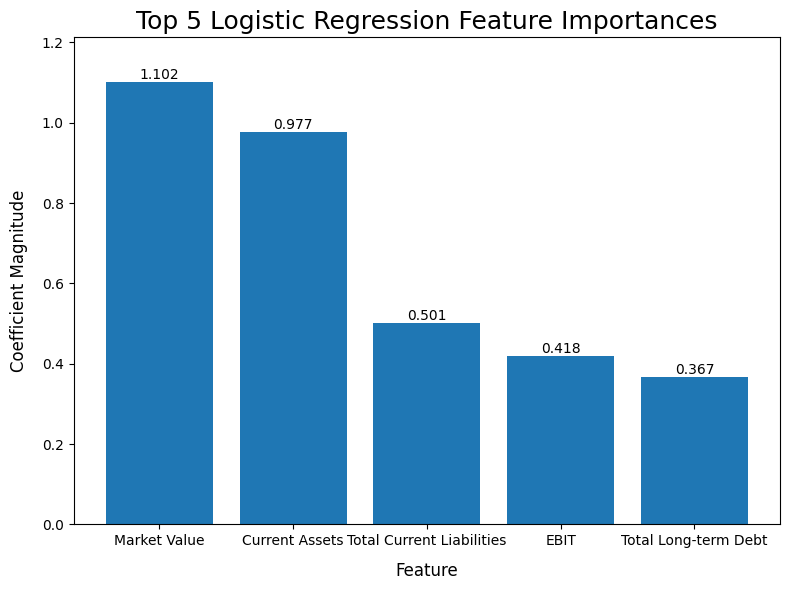

In [19]:
lr_coef = logreg_pipeline.named_steps['logreg'].coef_[0]
lr_importances = pd.Series(abs(lr_coef), index=features) \
                     .sort_values(ascending=False) \
                     .head(5)

plt.figure(figsize=(8, 6))
bars = plt.bar(lr_importances.index, lr_importances.values)

# X‑axis styling
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.xlabel('Feature', fontsize=12, labelpad=10)

# Y‑axis styling
plt.yticks(fontsize=10)
plt.ylabel('Coefficient Magnitude', fontsize=12, labelpad=10)

# Title styling
plt.title('Top 5 Logistic Regression Feature Importances', fontsize=18)

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# Add 10% padding above the tallest bar
max_h_lr = lr_importances.values.max()
plt.ylim(0, max_h_lr * 1.10)

plt.tight_layout()
plt.show()

In [ ]:
# KNN permutation importances
knn_perm = permutation_importance(knn_pipeline, X_test, y_test, n_repeats=10, random_state=42)
knn_importances = pd.Series(knn_perm.importances_mean, index=features) \
                     .sort_values(ascending=False)
print("\nKNN Permutation Importances:\n", knn_importances)


KNN Permutation Importances:
 Inventory                    0.048982
D&A                          0.048754
Total Long-term Debt         0.042688
Gross Profit                 0.039603
Retained Earnings            0.030695
Total Liabilities            0.023482
Cost of Goods Sold           0.005708
EBIT                         0.004975
Total Operating Expenses     0.001930
Total Revenue                0.001262
Net Sales                    0.001262
Total Current Liabilities    0.000244
Current Assets              -0.000090
Total Receivables           -0.000627
Total Assets                -0.001449
EBITDA                      -0.001767
Market Value                -0.002597
Net Income                  -0.004633
dtype: float64


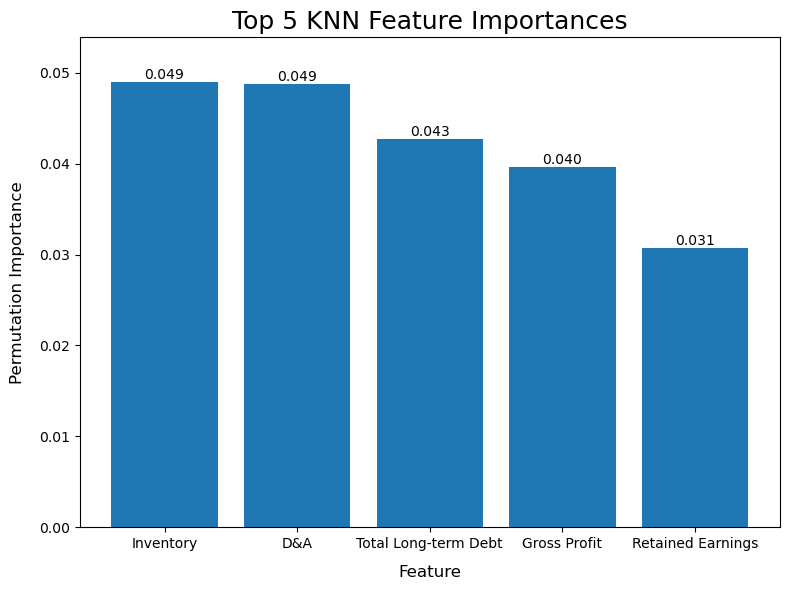

In [ ]:
# KNN Top 5 Permutation Importances

knn_perm = permutation_importance(knn_pipeline, X_test, y_test, n_repeats=10, random_state=42)
knn_importances = pd.Series(knn_perm.importances_mean, index=features) \
                     .sort_values(ascending=False) \
                     .head(5)

plt.figure(figsize=(8, 6))
bars = plt.bar(knn_importances.index, knn_importances.values)

# X‑axis styling
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.xlabel('Feature', fontsize=12, labelpad=10)

# Y‑axis styling
plt.yticks(fontsize=10)
plt.ylabel('Permutation Importance', fontsize=12, labelpad=10)

# Title styling
plt.title('Top 5 KNN Feature Importances', fontsize=18)

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# Add 10% padding above the tallest bar
max_h_knn = knn_importances.values.max()
plt.ylim(0, max_h_knn * 1.10)

plt.tight_layout()
plt.show()


In [ ]:
# Random Forest importances
rf_importances = pd.Series(rf_clf.feature_importances_, index=features) \
                   .sort_values(ascending=False)
print("\nRandom Forest Feature Importances:\n", rf_importances)


Random Forest Feature Importances:
 Retained Earnings            0.065674
Market Value                 0.062897
D&A                          0.061341
Current Assets               0.059910
Total Receivables            0.059713
Gross Profit                 0.058533
Total Liabilities            0.057575
Total Assets                 0.057426
Total Current Liabilities    0.055479
Inventory                    0.054929
Total Long-term Debt         0.054677
Net Income                   0.053633
Cost of Goods Sold           0.053133
EBITDA                       0.051601
EBIT                         0.050618
Total Operating Expenses     0.049919
Total Revenue                0.046852
Net Sales                    0.046092
dtype: float64


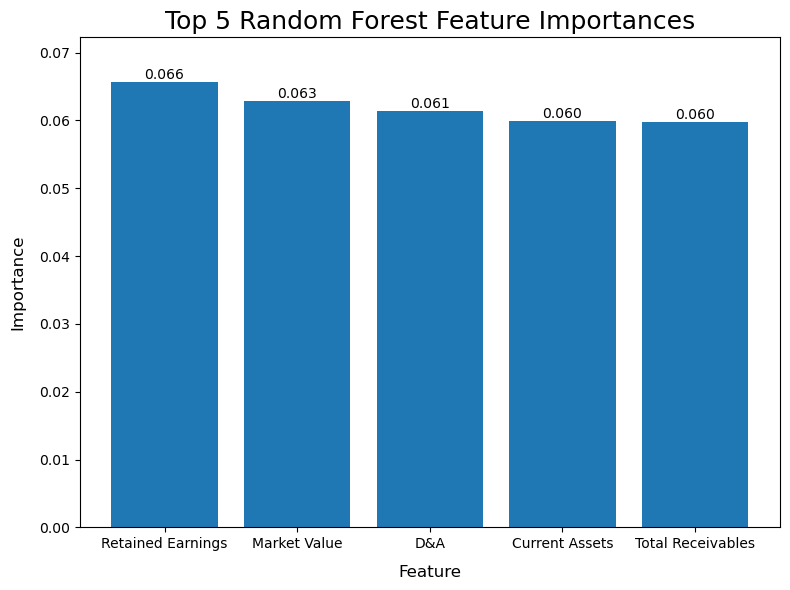

In [ ]:
# Random Forest Top 5 Feature Importances (Aesthetic)

top5_rf = pd.Series(rf_clf.feature_importances_, index=features) \
               .sort_values(ascending=False) \
               .head(5)

plt.figure(figsize=(8, 6))
bars = plt.bar(top5_rf.index, top5_rf.values)

# X‑axis styling
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.xlabel('Feature', fontsize=12, labelpad=10)

# Y‑axis styling
plt.yticks(fontsize=10)
plt.ylabel('Importance', fontsize=12, labelpad=10)

# Title styling
plt.title('Top 5 Random Forest Feature Importances', fontsize=18)

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# Add a 10% padding above the tallest bar
max_h_rf = top5_rf.values.max()
plt.ylim(0, max_h_rf * 1.10)

plt.tight_layout()
plt.show()


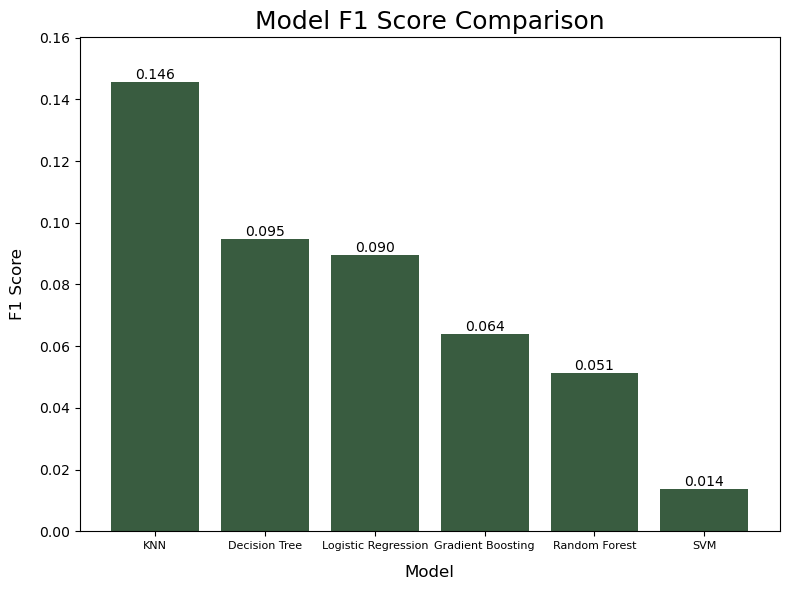

In [ ]:
# Compute F1 scores (ensure predictions and y_test are defined)
f1       = f1_score(y_test, y_pred)
f1_gb    = f1_score(y_test, y_pred_gb)
f1_rf    = f1_score(y_test, y_pred_rf)
f1_lr    = f1_score(y_test, y_pred_lr)
f1_svm   = f1_score(y_test, y_pred_svm)
f1_knn   = f1_score(y_test, y_pred_knn)

# Prepare series
f1_dict = {
    'Decision Tree':       f1,
    'Gradient Boosting':   f1_gb,
    'Random Forest':       f1_rf,
    'Logistic Regression': f1_lr,
    'SVM':                 f1_svm,
    'KNN':                 f1_knn
}
f1_series = pd.Series(f1_dict).sort_values(ascending=False)

# Plot with color #395c40
plt.figure(figsize=(8, 6))
bars = plt.bar(f1_series.index, f1_series.values, color='#395c40')

plt.xticks(rotation=0, ha='center', fontsize=8)
plt.xlabel('Model', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)
plt.ylabel('F1 Score', fontsize=12, labelpad=10)
plt.title('Model F1 Score Comparison', fontsize=18)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

# Add padding
max_f1 = f1_series.values.max()
plt.ylim(0, max_f1 * 1.10)

plt.tight_layout()
plt.show()


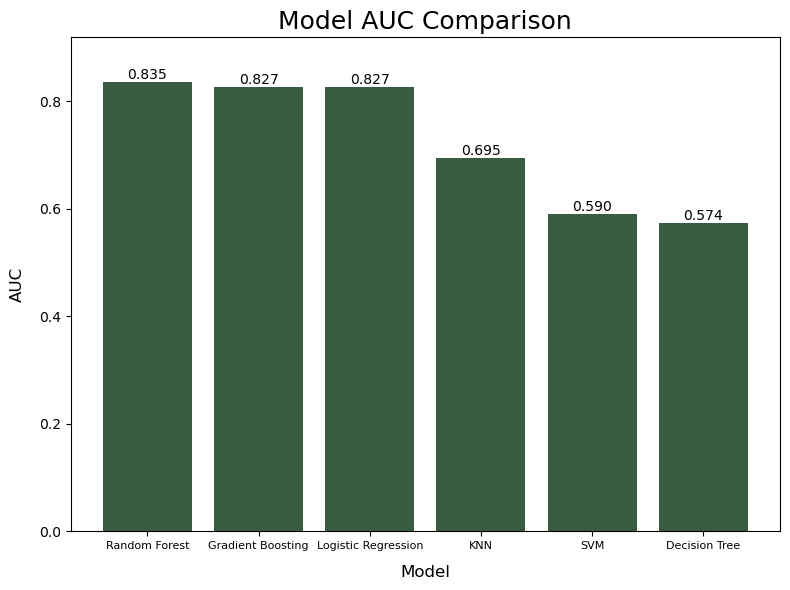

In [ ]:
auc_dict = {
    'Decision Tree':       roc_auc,
    'Gradient Boosting':   roc_auc_gb,
    'Random Forest':       roc_auc_rf,
    'Logistic Regression': roc_auc_lr,
    'SVM':                 roc_auc_svm,
    'KNN':                 roc_auc_knn
}
auc_series = pd.Series(auc_dict).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
bars = plt.bar(auc_series.index, auc_series.values, color='#395c40')

plt.xticks(rotation=0, ha='center', fontsize=8)
plt.xlabel('Model', fontsize=12, labelpad=10)

plt.yticks(fontsize=10)
plt.ylabel('AUC', fontsize=12, labelpad=10)

plt.title('Model AUC Comparison', fontsize=18)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:.3f}',
             ha='center',
             va='bottom')

max_auc = auc_series.values.max()
plt.ylim(0, max_auc * 1.10)

plt.tight_layout()
plt.show()


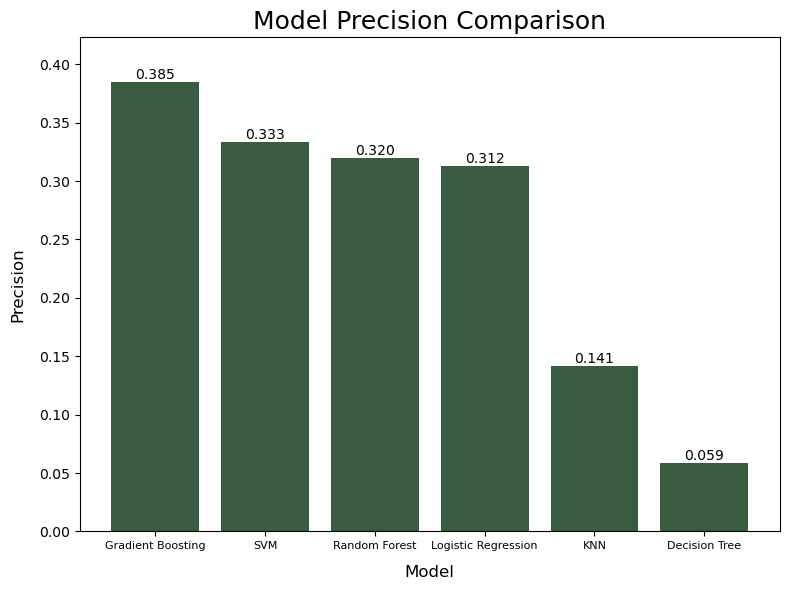

In [ ]:
# Chunk: Model Precision Comparison Bar Chart

precision_dict = {
    'Decision Tree':       precision_score(y_test, y_pred),
    'Gradient Boosting':   precision_score(y_test, y_pred_gb),
    'Random Forest':       precision_score(y_test, y_pred_rf),
    'Logistic Regression': precision_score(y_test, y_pred_lr),
    'SVM':                 precision_score(y_test, y_pred_svm),
    'KNN':                 precision_score(y_test, y_pred_knn)
}
precision_series = pd.Series(precision_dict).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
bars = plt.bar(precision_series.index, precision_series.values, color='#395c40')

plt.xticks(rotation=0, ha='center', fontsize=8)
plt.xlabel('Model', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)
plt.ylabel('Precision', fontsize=12, labelpad=10)
plt.title('Model Precision Comparison', fontsize=18)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

max_prec = precision_series.max()
plt.ylim(0, max_prec * 1.10)

plt.tight_layout()
plt.show()


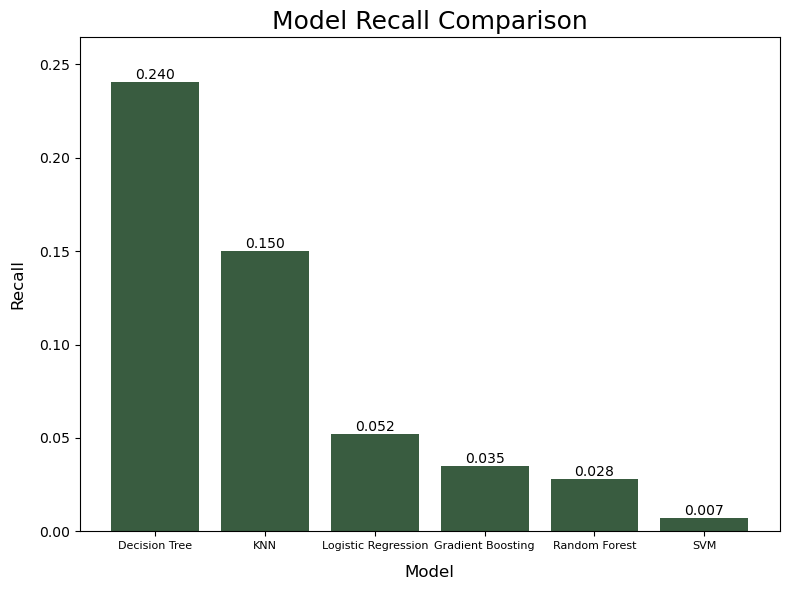

In [ ]:
# Chunk: Model Recall Comparison Bar Chart

recall_dict = {
    'Decision Tree':       recall_score(y_test, y_pred),
    'Gradient Boosting':   recall_score(y_test, y_pred_gb),
    'Random Forest':       recall_score(y_test, y_pred_rf),
    'Logistic Regression': recall_score(y_test, y_pred_lr),
    'SVM':                 recall_score(y_test, y_pred_svm),
    'KNN':                 recall_score(y_test, y_pred_knn)
}
recall_series = pd.Series(recall_dict).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
bars = plt.bar(recall_series.index, recall_series.values, color='#395c40')

plt.xticks(rotation=0, ha='center', fontsize=8)
plt.xlabel('Model', fontsize=12, labelpad=10)
plt.yticks(fontsize=10)
plt.ylabel('Recall', fontsize=12, labelpad=10)
plt.title('Model Recall Comparison', fontsize=18)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

max_rec = recall_series.max()
plt.ylim(0, max_rec * 1.10)

plt.tight_layout()
plt.show()


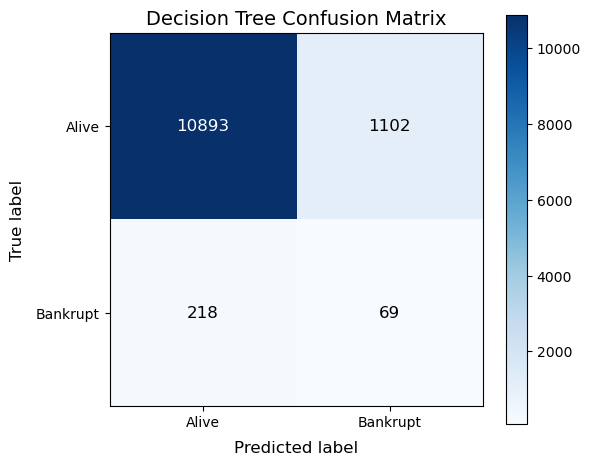

In [ ]:
# Chunk: Colorful Confusion Matrices for All Models

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted label', fontsize=12, labelpad=8)
    plt.ylabel('True label', fontsize=12, labelpad=8)
    plt.xticks([0, 1], ['Alive', 'Bankrupt'], fontsize=10)
    plt.yticks([0, 1], ['Alive', 'Bankrupt'], fontsize=10)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
                     color='white' if cm[i, j] > thresh else 'black', fontsize=12)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred,     'Decision Tree Confusion Matrix')


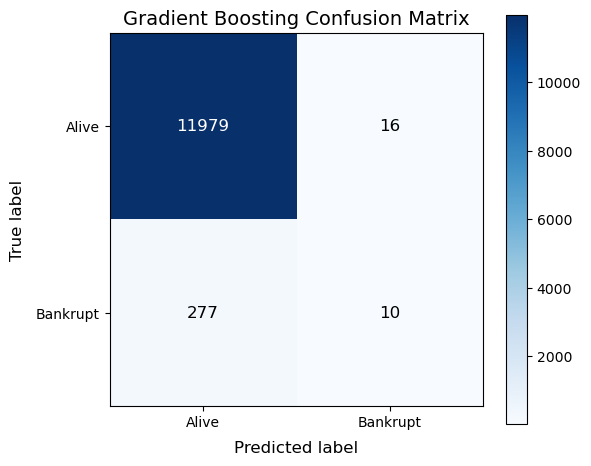

In [ ]:
plot_confusion_matrix(y_test, y_pred_gb,  'Gradient Boosting Confusion Matrix')

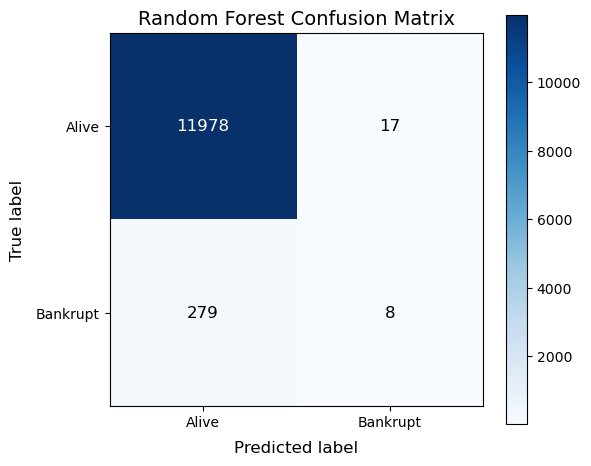

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf,  'Random Forest Confusion Matrix')

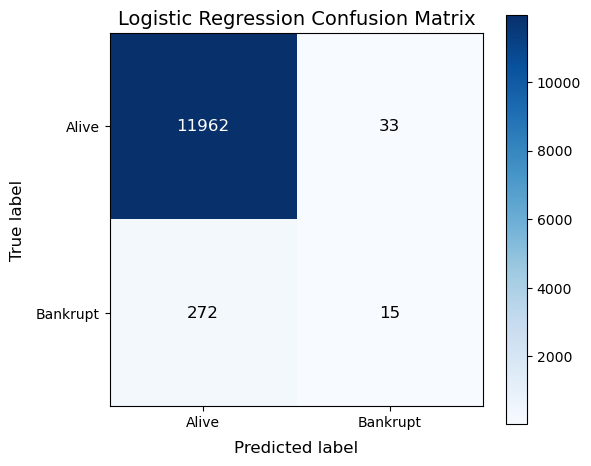

In [ ]:
plot_confusion_matrix(y_test, y_pred_lr,  'Logistic Regression Confusion Matrix')

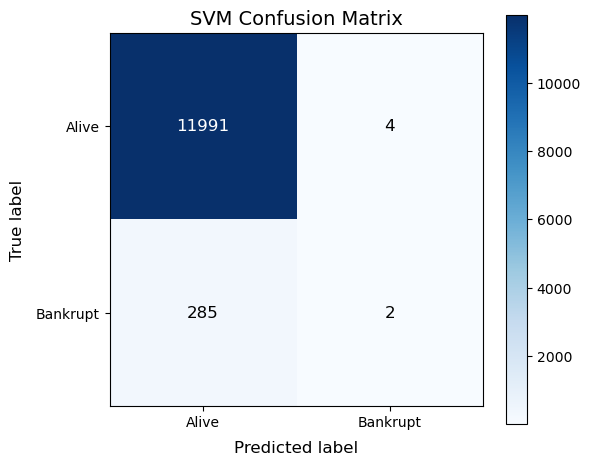

In [ ]:
plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

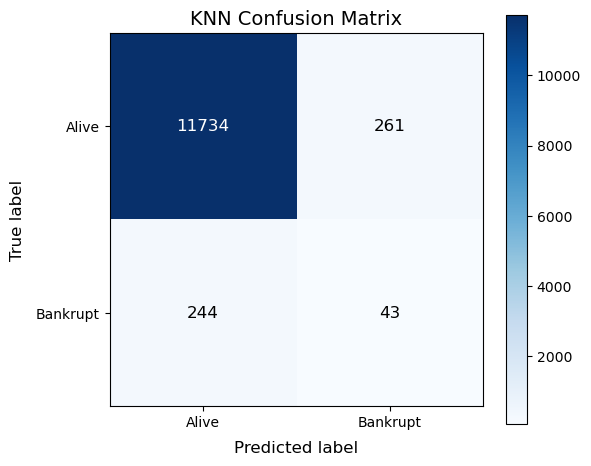

In [ ]:
plot_confusion_matrix(y_test, y_pred_knn,'KNN Confusion Matrix')

SOME STATISTICS AND CALCULATION


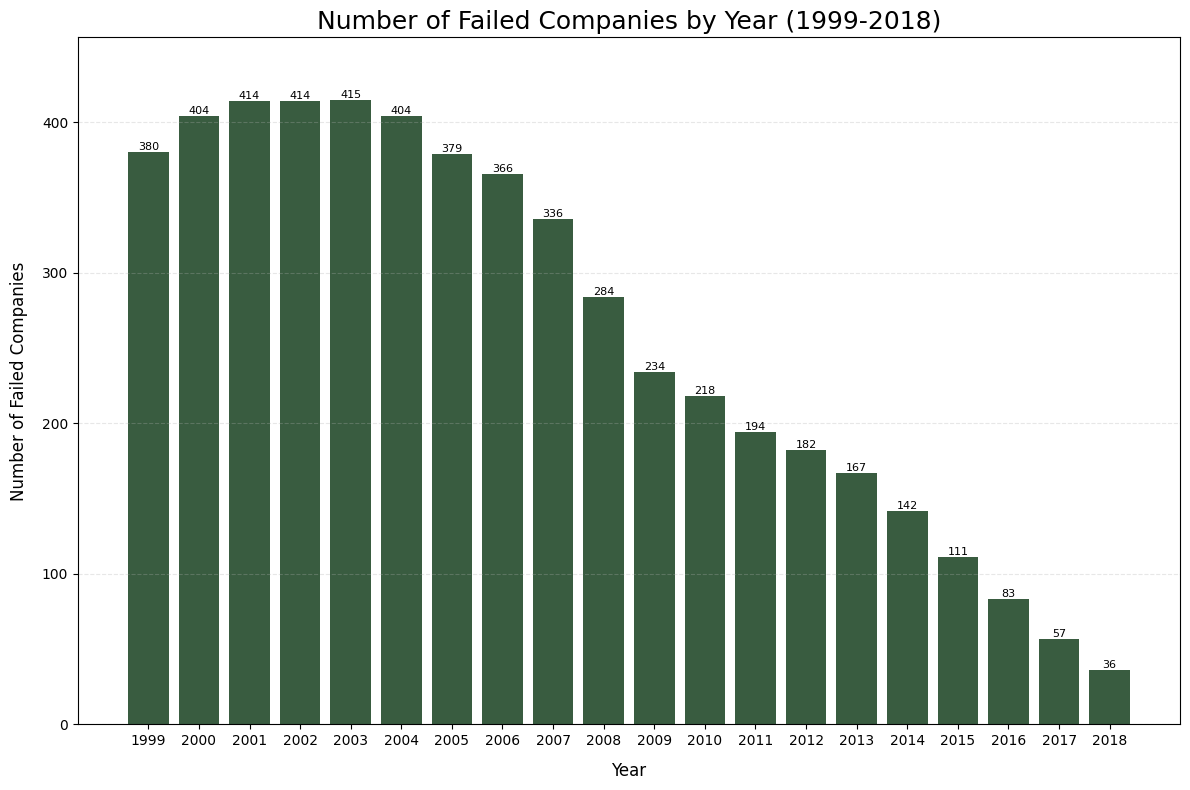

Total number of failed companies: 5220
Average failures per year: 261.0
Year with most failures: 2003 (415 failures)
Year with least failures: 2018 (36 failures)


In [26]:
# Data for failed companies by year
year_data = {
    'year': [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
             2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'failed': [380, 404, 414, 414, 415, 404, 379, 366, 336, 284,
               234, 218, 194, 182, 167, 142, 111, 83, 57, 36]
}

# Create DataFrame
df_failed = pd.DataFrame(year_data)

# Create bar chart with the same style
plt.figure(figsize=(12, 8))
bars = plt.bar(df_failed['year'], df_failed['failed'], color='#395c40')

# X-axis styling
plt.xticks(df_failed['year'], rotation=0, ha='center', fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=10)

# Y-axis styling
plt.yticks(fontsize=10)
plt.ylabel('Number of Failed Companies', fontsize=12, labelpad=10)

# Title styling
plt.title('Number of Failed Companies by Year (1999-2018)', fontsize=18)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add 10% padding above the tallest bar
max_h = df_failed['failed'].max()
plt.ylim(0, max_h * 1.10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Calculate total failed companies
total_failed = df_failed['failed'].sum()
print(f"Total number of failed companies: {total_failed}")

# Calculate average failures per year
avg_failed = df_failed['failed'].mean()
print(f"Average failures per year: {avg_failed:.1f}")

# Find year with most failures
max_year = df_failed.loc[df_failed['failed'].idxmax(), 'year']
max_failures = df_failed['failed'].max()
print(f"Year with most failures: {max_year} ({max_failures} failures)")

# Find year with least failures
min_year = df_failed.loc[df_failed['failed'].idxmin(), 'year']
min_failures = df_failed['failed'].min()
print(f"Year with least failures: {min_year} ({min_failures} failures)")

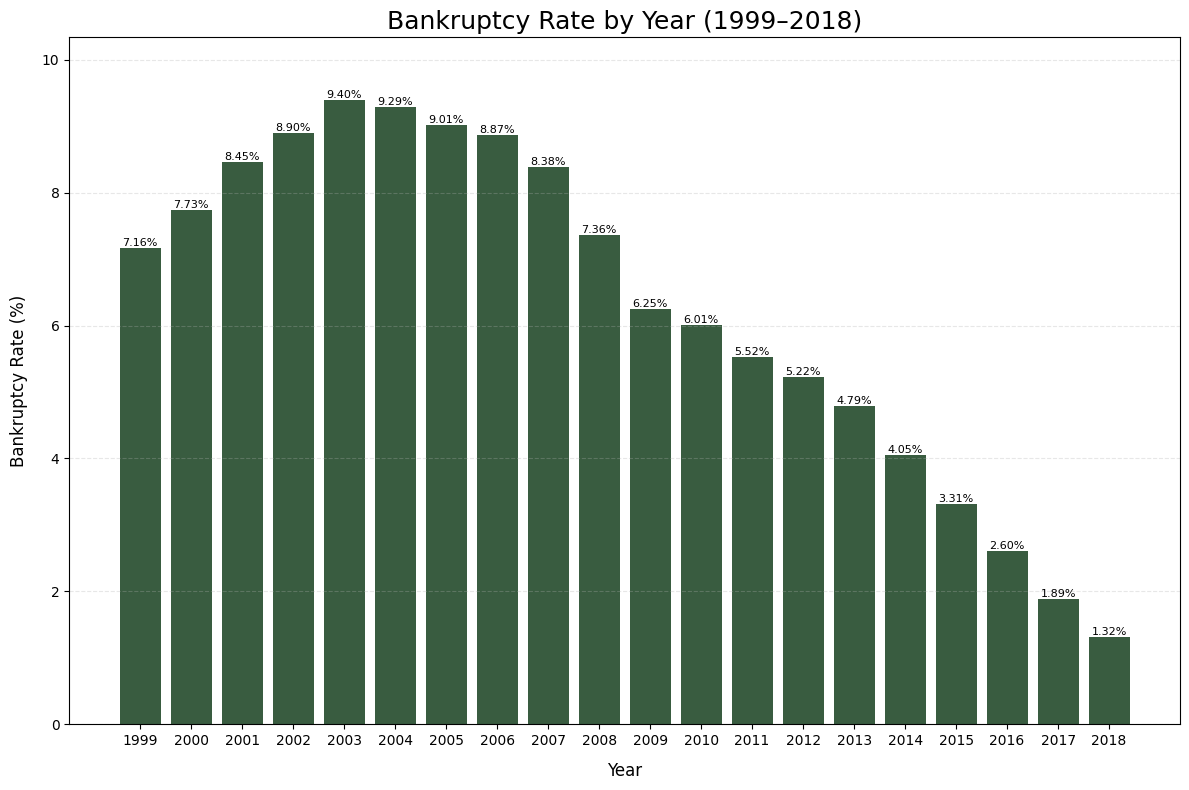

Average bankruptcy rate: 6.28%
Year with highest bankruptcy rate: 2003 (9.40%)
Year with lowest bankruptcy rate: 2018 (1.32%)
Change in bankruptcy rate from 1999.0 to 2018.0: -81.5%


In [4]:
df = pd.read_csv('american_bankruptcy.csv')
df['is_failed'] = df['status_label'].map({'failed': 1, 'alive': 0})

# Compute annual bankruptcy rate (%)
df_rate = (
    df
    .groupby('year')['is_failed']
    .mean()
    .reset_index(name='rate')
)
df_rate['rate'] *= 100

# Plot bar chart with styling matching the failed-companies example
plt.figure(figsize=(12, 8))
bars = plt.bar(df_rate['year'], df_rate['rate'], color='#395c40')

# X-axis styling
plt.xticks(df_rate['year'], rotation=0, ha='center', fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=10)

# Y-axis styling
plt.yticks(fontsize=10)
plt.ylabel('Bankruptcy Rate (%)', fontsize=12, labelpad=10)

# Title styling
plt.title('Bankruptcy Rate by Year (1999–2018)', fontsize=18)

# Annotate bars with percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add 10% padding above the tallest bar
max_h = df_rate['rate'].max()
plt.ylim(0, max_h * 1.10)

# Add horizontal gridlines
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Summary statistics
avg_rate = df_rate['rate'].mean()
print(f"Average bankruptcy rate: {avg_rate:.2f}%")

max_idx = df_rate['rate'].idxmax()
print(f"Year with highest bankruptcy rate: {df_rate.loc[max_idx, 'year']} ({df_rate.loc[max_idx, 'rate']:.2f}%)")

min_idx = df_rate['rate'].idxmin()
print(f"Year with lowest bankruptcy rate: {df_rate.loc[min_idx, 'year']} ({df_rate.loc[min_idx, 'rate']:.2f}%)")

start_year = df_rate.iloc[0]['year']
start_rate = df_rate.iloc[0]['rate']
end_year   = df_rate.iloc[-1]['year']
end_rate   = df_rate.iloc[-1]['rate']
pct_change = ((end_rate - start_rate) / start_rate) * 100
print(f"Change in bankruptcy rate from {start_year} to {end_year}: {pct_change:.1f}%")
